Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   4

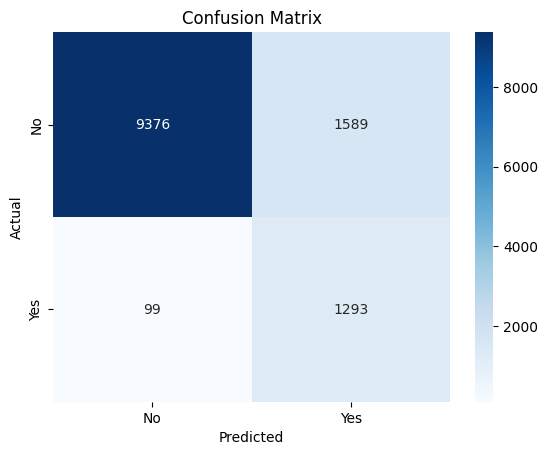

Precision: 0.4486
Recall: 0.9289
F1 Score: 0.6051
Accuracy: 0.8634


In [ ]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets
from sklearn.ensemble import RandomForestClassifier  # For training a Random Forest model
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score  # For evaluating the model
import seaborn as sns  # For visualizing the confusion matrix
import matplotlib.pyplot as plt  # For plotting

# Load the Bank Marketing Dataset
# Dataset Source: UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)
# The dataset is related to direct marketing campaigns of a Portuguese banking institution.
# The goal is to predict whether a client will subscribe to a term deposit (target variable 'y').
url = "bank-additional-full.csv"  # Ensure the file is in the correct path or provide the full path
df = pd.read_csv('bank-additional-full.csv', sep=';') # Use ';' as the delimiter since the dataset is CSV with semicolon separator

# Check the dataset
print("Dataset Info:")
print(df.info())  # Print information about the dataset, including column names, data types, and non-null counts

# Print column names to verify the target column
print("\nColumn Names:")
print(df.columns)  # Print all column names to ensure the target column is present

# Check the class distribution
# The target column is 'y', which indicates whether the client subscribed to a term deposit ('yes' or 'no').
# The dataset is highly imbalanced, with most clients not subscribing.
target_column = 'y'  # Update this if the target column has a different name
print("\nClass Distribution:\n", df[target_column].value_counts())  # Print the count of each class in the target column

# Encode categorical variables
# The dataset contains categorical variables like 'job', 'marital', 'education', etc.
# These need to be converted into numerical format using one-hot encoding.
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'], drop_first=True)

# Convert target variable to binary (0 for "no", 1 for "yes")
# The target variable 'y' is originally in string format ('yes' or 'no').
# We map 'no' to 0 and 'yes' to 1 for binary classification.
df[target_column] = df[target_column].map({'no': 0, 'yes': 1})

# Features and target
# X contains all the features (independent variables), and y contains the target (dependent variable).
X = df.drop(target_column, axis=1)  # Drop the target column to get the features
y = df[target_column]  # Use the target column as the target variable

# Split the data into training and testing sets
# We use 70% of the data for training and 30% for testing.
# The 'stratify' parameter ensures that the class distribution is preserved in both training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# TODO: Enable SMOTE to handle class imbalance
# SMOTE (Synthetic Minority Over-sampling Technique) is used to handle class imbalance.
# It generates synthetic samples for the minority class to balance the dataset.
# Uncomment the following lines to enable SMOTE:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42)
# X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
# X_train, y_train = X_train_res, y_train_res  # Replace the original training data with the resampled data

# Train a Random Forest Classifier with class_weight='balanced'
# Random Forest is an ensemble learning method that builds multiple decision trees and combines their outputs.
# The 'class_weight' parameter is set to 'balanced' to give more importance to the minority class.
clf = RandomForestClassifier(
    n_estimators=200,  # Number of trees in the forest
    max_depth=10,  # Maximum depth of each tree
    min_samples_split=5,  # Minimum number of samples required to split a node
    min_samples_leaf=2,  # Minimum number of samples required at a leaf node
    class_weight='balanced',  # Adjust class weights to handle imbalance
    random_state=42  # Set a random seed for reproducibility
)
clf.fit(X_train, y_train)  # Train the model on the training data

# Make predictions on the test set
y_pred = clf.predict(X_test)  # Predict the target variable for the test set

# Print classification report
# The classification report includes precision, recall, F1 score, and support for each class.
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
# The confusion matrix shows the number of true positives, true negatives, false positives, and false negatives.
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Precision, Recall, F1 Score, and Accuracy
# Precision: The ratio of true positives to the total predicted positives. It measures the model's accuracy in predicting the positive class.
# Recall: The ratio of true positives to the total actual positives. It measures the model's ability to identify all positive samples.
# F1 Score: The harmonic mean of precision and recall. It provides a balance between the two.
# Accuracy: The ratio of correct predictions to the total predictions. It measures the overall correctness of the model.
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")  # Print precision
print(f"Recall: {recall:.4f}")  # Print recall
print(f"F1 Score: {f1:.4f}")  # Print F1 score
print(f"Accuracy: {accuracy:.4f}")  # Print accuracy

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   4

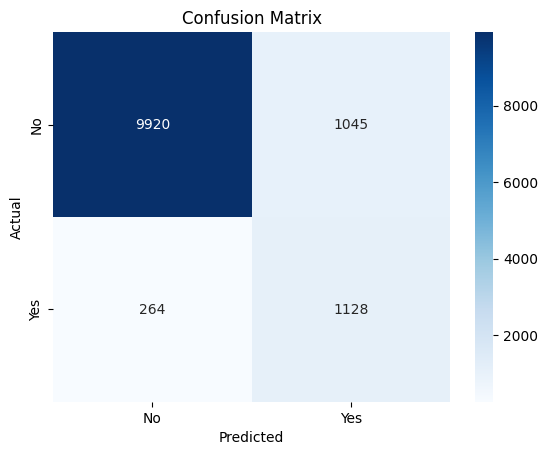

Precision: 0.5191
Recall: 0.8103
F1 Score: 0.6328
Accuracy: 0.8941


In [ ]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets
from sklearn.ensemble import RandomForestClassifier  # For training a Random Forest model
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score  # For evaluating the model
import seaborn as sns  # For visualizing the confusion matrix
import matplotlib.pyplot as plt  # For plotting
from imblearn.over_sampling import SMOTE


# Load the Bank Marketing Dataset
# Dataset Source: UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)
# The dataset is related to direct marketing campaigns of a Portuguese banking institution.
# The goal is to predict whether a client will subscribe to a term deposit (target variable 'y').
url = "bank-additional-full.csv"  # Ensure the file is in the correct path or provide the full path
df = pd.read_csv('bank-additional-full.csv', sep=';') # Use ';' as the delimiter since the dataset is CSV with semicolon separator

# Check the dataset
print("Dataset Info:")
print(df.info())  # Print information about the dataset, including column names, data types, and non-null counts

# Print column names to verify the target column
print("\nColumn Names:")
print(df.columns)  # Print all column names to ensure the target column is present

# Check the class distribution
# The target column is 'y', which indicates whether the client subscribed to a term deposit ('yes' or 'no').
# The dataset is highly imbalanced, with most clients not subscribing.
target_column = 'y'  # Update this if the target column has a different name
print("\nClass Distribution:\n", df[target_column].value_counts())  # Print the count of each class in the target column

# Encode categorical variables
# The dataset contains categorical variables like 'job', 'marital', 'education', etc.
# These need to be converted into numerical format using one-hot encoding.
df = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'], drop_first=True)

# Convert target variable to binary (0 for "no", 1 for "yes")
# The target variable 'y' is originally in string format ('yes' or 'no').
# We map 'no' to 0 and 'yes' to 1 for binary classification.
df[target_column] = df[target_column].map({'no': 0, 'yes': 1})

# Features and target
# X contains all the features (independent variables), and y contains the target (dependent variable).
X = df.drop(target_column, axis=1)  # Drop the target column to get the features
y = df[target_column]  # Use the target column as the target variable

# Split the data into training and testing sets
# We use 70% of the data for training and 30% for testing.
# The 'stratify' parameter ensures that the class distribution is preserved in both training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# TODO: Enable SMOTE to handle class imbalance
# SMOTE (Synthetic Minority Over-sampling Technique) is used to handle class imbalance.
# It generates synthetic samples for the minority class to balance the dataset.
# Uncomment the following lines to enable SMOTE:
# from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
X_train, y_train = X_train_res, y_train_res  # Replace the original training data with the resampled data

# Train a Random Forest Classifier with class_weight='balanced'
# Random Forest is an ensemble learning method that builds multiple decision trees and combines their outputs.
# The 'class_weight' parameter is set to 'balanced' to give more importance to the minority class.
clf = RandomForestClassifier(
    n_estimators=200,  # Number of trees in the forest
    max_depth=10,  # Maximum depth of each tree
    min_samples_split=5,  # Minimum number of samples required to split a node
    min_samples_leaf=2,  # Minimum number of samples required at a leaf node
    class_weight='balanced',  # Adjust class weights to handle imbalance
    random_state=42  # Set a random seed for reproducibility
)
clf.fit(X_train, y_train)  # Train the model on the training data

# Make predictions on the test set
y_pred = clf.predict(X_test)  # Predict the target variable for the test set

# Print classification report
# The classification report includes precision, recall, F1 score, and support for each class.
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
# The confusion matrix shows the number of true positives, true negatives, false positives, and false negatives.
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Precision, Recall, F1 Score, and Accuracy
# Precision: The ratio of true positives to the total predicted positives. It measures the model's accuracy in predicting the positive class.
# Recall: The ratio of true positives to the total actual positives. It measures the model's ability to identify all positive samples.
# F1 Score: The harmonic mean of precision and recall. It provides a balance between the two.
# Accuracy: The ratio of correct predictions to the total predictions. It measures the overall correctness of the model.
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")  # Print precision
print(f"Recall: {recall:.4f}")  # Print recall
print(f"F1 Score: {f1:.4f}")  # Print F1 score
print(f"Accuracy: {accuracy:.4f}")  # Print accuracy